In [1]:
import tensorflow as tf


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-01-20 15:22:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-20 15:22:25 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import *

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-01-20 15:22:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.31.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   117MB/s    in 1.4s    

2024-01-20 15:22:28 (117 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")

In [6]:
walk_through_dir("10_food_classes_10_percent/")

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percen

In [7]:
IMG_SIZE  = (224,224)
BATCH_SIZE = 32
TRAIN_DIR = "10_food_classes_10_percent/train"
TEST_DIR = "10_food_classes_10_percent/test"

train_10_data = tf.keras.preprocessing.image_dataset_from_directory(TRAIN_DIR,
                                                                    image_size =  IMG_SIZE,
                                                                    label_mode='categorical',
                                                                    batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(TEST_DIR,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
back_bone = tf.keras.applications.EfficientNetB0(include_top=False)
back_bone.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))
x = back_bone(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_0 = tf.keras.Model(inputs,  outputs)
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [24]:

initial_epochs = 10
checkpoint_path = "model_0/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         save_freq='epoch')

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [25]:
history_0 = model_0.fit(train_10_data,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[checkpoint_callback])

Epoch 1/10
24/24 [==============================] - 13s 272ms/step - loss: 1.9617 - accuracy: 0.3653 - val_loss: 1.3664 - val_accuracy: 0.7155
Epoch 2/10
24/24 [==============================] - 5s 190ms/step - loss: 1.1031 - accuracy: 0.7693 - val_loss: 0.8863 - val_accuracy: 0.8240
Epoch 3/10
24/24 [==============================] - 5s 203ms/step - loss: 0.7781 - accuracy: 0.8267 - val_loss: 0.7131 - val_accuracy: 0.8421
Epoch 4/10
24/24 [==============================] - 5s 201ms/step - loss: 0.6194 - accuracy: 0.8600 - val_loss: 0.5904 - val_accuracy: 0.8651
Epoch 5/10
24/24 [==============================] - 6s 228ms/step - loss: 0.5214 - accuracy: 0.8880 - val_loss: 0.5552 - val_accuracy: 0.8618
Epoch 6/10
24/24 [==============================] - 5s 198ms/step - loss: 0.4512 - accuracy: 0.9053 - val_loss: 0.5099 - val_accuracy: 0.8750
Epoch 7/10
24/24 [==============================] - 5s 198ms/step - loss: 0.3974 - accuracy: 0.9293 - val_loss: 0.4932 - val_accuracy: 0.8734
Epoch

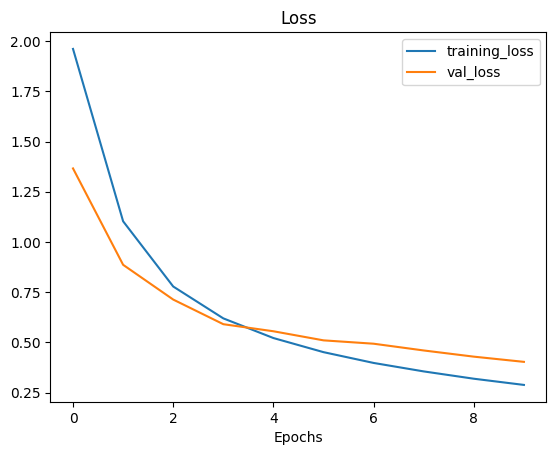

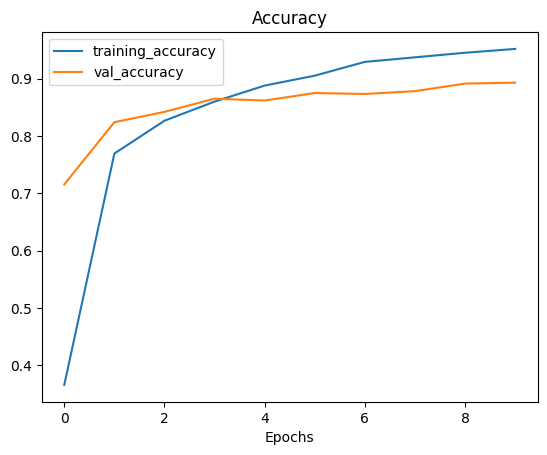

In [26]:
plot_loss_curves(history_0)

# 2. Fine-tune the last 20 layers

In [27]:
for num, layer in enumerate(model_0.layers[1].layers):
  print(num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [28]:
back_bone.trainable = True
for layer in back_bone.layers[:-20]:
  layer.trainable = False

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])


In [29]:
for num,  layer in enumerate(model_0.layers[1].layers):
  print(num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [30]:
fine_tune_epochs = initial_epochs + 10
history_1 =  model_0.fit(train_10_data,
            epochs=fine_tune_epochs,
            validation_steps=int(0.25 * len(test_data)),
            validation_data=test_data,
            initial_epoch=history_0.epoch[-1],
            callbacks=[checkpoint_callback])

Epoch 10/20
24/24 [==============================] - 17s 280ms/step - loss: 0.2325 - accuracy: 0.9547 - val_loss: 0.3597 - val_accuracy: 0.8832
Epoch 11/20
24/24 [==============================] - 6s 216ms/step - loss: 0.1273 - accuracy: 0.9720 - val_loss: 0.3791 - val_accuracy: 0.8750
Epoch 12/20
24/24 [==============================] - 4s 154ms/step - loss: 0.0770 - accuracy: 0.9867 - val_loss: 0.3402 - val_accuracy: 0.8898
Epoch 13/20
24/24 [==============================] - 5s 181ms/step - loss: 0.0451 - accuracy: 0.9960 - val_loss: 0.3478 - val_accuracy: 0.8914
Epoch 14/20
24/24 [==============================] - 5s 179ms/step - loss: 0.0264 - accuracy: 0.9987 - val_loss: 0.3658 - val_accuracy: 0.8865
Epoch 15/20
24/24 [==============================] - 4s 136ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.3672 - val_accuracy: 0.8783
Epoch 16/20
24/24 [==============================] - 5s 182ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.3877 - val_accuracy: 0.883

# 3. Fine-tune the last 30 layers

In [31]:
back_bone.trainable =  True
for layer in back_bone.layers[:-30]:
  layer.trainable = False

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
for num, layer in enumerate(model_0.layers[1].layers):
  print(num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [34]:
fine_tune_30_epochs =  fine_tune_epochs + 10
history_2 = model_0.fit(train_10_data,
                        epochs=fine_tune_30_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_1.epoch[-1],
                        callbacks=[checkpoint_callback])


Epoch 20/30
24/24 [==============================] - 15s 201ms/step - loss: 0.2807 - accuracy: 0.9080 - val_loss: 0.4289 - val_accuracy: 0.8569
Epoch 21/30
24/24 [==============================] - 6s 207ms/step - loss: 0.0550 - accuracy: 0.9893 - val_loss: 0.4059 - val_accuracy: 0.8799
Epoch 22/30
24/24 [==============================] - 4s 141ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 0.4136 - val_accuracy: 0.8668
Epoch 23/30
24/24 [==============================] - 7s 297ms/step - loss: 0.0067 - accuracy: 0.9973 - val_loss: 0.4822 - val_accuracy: 0.8734
Epoch 24/30
24/24 [==============================] - 5s 185ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4254 - val_accuracy: 0.8980
Epoch 25/30
24/24 [==============================] - 5s 184ms/step - loss: 6.4880e-04 - accuracy: 1.0000 - val_loss: 0.3957 - val_accuracy: 0.8980
Epoch 26/30
24/24 [==============================] - 5s 183ms/step - loss: 3.0461e-04 - accuracy: 1.0000 - val_loss: 0.4737 - val_accurac